In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from pathlib import Path
import pickle
import csv
import math

In [12]:
cmaps = ['Greys', 'Reds', 'Purples', 'Blues', 'Greens', 'Oranges', 'PuBu', 'YlOrRd', 'Reds', 'Purples', 'Blues', 'Greens', 'Oranges', 'PuBu', 'YlOrRd','Greys', 'Reds']
bodyparts = ["driveFront", "driveRight", "driveBack", "driveLeft", "maybeNose", "HostNose","HostREar","HostLEar","HostNeck","HostCoM","HostTail",
             "visitNose","visitREar","visitLEar","visitNeck","visitCoM","visitTail"]

In [3]:
def load_csv(fp):
    with open(fp, 'r') as f:
        lines = f.readlines()
    return np.genfromtxt(lines, delimiter=',', names=True, skip_header=True)

In [32]:
def plot_traces(res, ph=33, pw=7, title=None, line_alpha=1.):
    fig, ax = plt.subplots(3, 17, figsize=(ph, pw))
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=0)
    if title:
        fig.suptitle(title)
        
    for n in range(17):
        x = [r[1+n*3] for r in res[1:]]
        y = [r[2+n*3] for r in res[1:]]
        prob = [r[3+n*3] for r in res[1:]]

        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)

        norm = plt.Normalize(0, 300)
        lc = LineCollection(segments, cmap=cmaps[n], norm=norm, alpha=line_alpha) #'viridis'
        lc.set_array(np.arange(0, 299))
        ax[0, n].add_collection(lc)

        ax[0, n].set_xlim(0, 700)
        ax[0, n].set_ylim(0, 700)
        ax[0, n].set_title(bodyparts[n])
        if(n):
            ax[0, n].set_xticks([])
            ax[0, n].set_yticks([])
        
        mx_speed = 250
        dp = np.sqrt(np.power(np.diff(x), 2) + np.power(np.diff(y), 2))
        points = np.array([np.arange(len(dp)), dp]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        norm = plt.Normalize(0, mx_speed)
        lc = LineCollection(segments, cmap='magma', norm=norm, alpha=line_alpha) #'viridis'
        lc.set_array(dp)
        
        ax[1, n].add_collection(lc)
        ax[1, n].set_ylim(0, mx_speed)
        ax[1, n].set_xlim(0, len(points))
        if(n):
            ax[1, n].set_xticks([])
            ax[1, n].set_yticks([])
        
        mx_prob = 2
        points = np.array([np.arange(len(prob)), prob]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        norm = plt.Normalize(0, mx_speed)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        lc = LineCollection(segments, cmap='magma', norm=norm, alpha=line_alpha) #'viridis'
        ax[2,n].add_collection(lc)
        ax[2, n].set_ylim(0, 2)
        ax[2, n].set_xlim(0, len(points))  
        
    ax[0, 0].set_ylabel('Position')
    ax[1, 0].set_ylabel('Speed')
    ax[1, 0].set_xlabel('Time (s)')

In [33]:
def simple_plot(res):
    fig, ax = plt.subplots(1, 8, figsize=(20, 2.8))
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=None)
    for n in range(8):
        x = [r[1+n*3] for r in res[1:]]
        y = [r[2+n*3] for r in res[1:]]
        ax[n].plot(x, y, color=f'C{n}')
        ax[n].set_xlim(0, 1800)
        ax[n].set_ylim(150, 620)
        if(n):
            ax[n].set_xticks([])
            ax[n].set_yticks([])

In [34]:
bp = Path('/home/melisa/Documents/social_interaction/')
bp.exists()

True

In [118]:
csp = bp / 'full_session'
print(csp)
res1 = load_csv(list(csp.glob('*.csv'))[0])
plot_traces(res1, 32, 6, 'm57697-full_bias09_off1', line_alpha=0.5)

#csp = bp / 'full_session'
#res2 = load_csv(list(csp.glob('*.csv'))[0])
#plot_traces(res2, 32, 6, 'm57697-full_no_bias', line_alpha=0.5)

/home/melisa/Documents/social_interaction/full_session
Error in callback <function flush_figures at 0x7f934bc75680> (for post_execute):


KeyboardInterrupt: 

In [ ]:
def offender_plot(res):
    fig, ax = plt.subplots(2, 4, figsize=(20, 10))
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=0)
    for n in range(4):
        x1 = [r[1+n*3] for r in res[1:]]
        y1 = [r[2+n*3] for r in res[1:]]
        ax[0, n].plot(x1, y1, color=f'C{n}')
        
        x2 = [r[1+(n+4)*3] for r in res[1:]]
        y2 = [r[2+(n+4)*3] for r in res[1:]]
        ax[0, n].plot(x2, y2, color=f'C{n+4}', alpha=0.7)
        
        ax[0, n].set_xlim(20, 620)
        ax[0, n].set_ylim(80, 630)
        if(n):
            ax[0, n].set_xticks([])
            ax[0, n].set_yticks([])
            
        diag = np.arange(700)
        ax[1, n].scatter(x1, x2, color=f'C{n+4}', s=0.5)
        ax[1, n].plot(diag, diag, color='k', alpha=0.1)
        ax[1, n].set_xlim(20, 600)
        ax[1, n].set_ylim(20, 600)
        if(n):
            ax[1, n].set_xticks([])
            ax[1, n].set_yticks([])
offender_plot(res1)

In [37]:
def count_swaps(res, threshold):
    
    n_swaps = np.zeros((17,1))
    for n in range(8):
        x = [r[1+n*3] for r in res[1:]]
        y = [r[2+n*3] for r in res[1:]]
        dp = np.sqrt(np.power(np.diff(x), 2) + np.power(np.diff(y), 2))
        swaps = np.where(dp > threshold)[0]
        n_swaps[n] = swaps.shape[0]
    return n_swaps

def signal_to_noise_ratio(res):
    ratio = np.zeros((17,1))
    for n in range(8):
        x = [r[1+n*3] for r in res[1:]]
        y = [r[2+n*3] for r in res[1:]]
        dp = np.sqrt(np.power(np.diff(x), 2) + np.power(np.diff(y), 2))
        dp_mean = np.mean(dp)
        dp_std = np.std(dp)
        ratio[n] = dp_mean/dp_std
    return ratio

def closest_body_part(res,threshold):
    
    swaps = []
    for n in range(5,17):
        x = [r[1+n*3] for r in res[1:]]
        y = [r[2+n*3] for r in res[1:]]
        dp = np.sqrt(np.power(np.diff(x), 2) + np.power(np.diff(y), 2))
        swaps.append(np.where(dp > threshold)[0])
    
    for n in range(len(swaps)):
        x = [r[1+n*3] for r in res[swaps[n]]]
        y = [r[2+n*3] for r in res[swaps[n]]]
    
    
    return confusion

In [112]:
swaps1 = count_swaps(res1,25)
swaps2 = count_swaps(res2,25)

In [113]:
print('Original swaps: ' + f'{np.sum(swaps1)/len(res1)}')
print('Bias swaps: ' + f'{np.sum(swaps2)/len(res2)}')

print('SNR original:' + f'{np.mean(signal_to_noise_ratio(res1))}')
print('SNR biased: '+ f'{np.mean(signal_to_noise_ratio(res2))}')

Original swaps: 0.004225989837500629
Bias swaps: 0.004225989837500629
SNR original:0.5281770393665366
SNR biased: 0.5281770393665366


In [162]:
res = res1
threshold = 100
swaps = []
for n in range(5,17):
    x = [r[1+n*3] for r in res[1:]]
    y = [r[2+n*3] for r in res[1:]]
    dp = np.sqrt(np.power(np.diff(x), 2) + np.power(np.diff(y), 2))
    swaps.append(np.where(dp > threshold)[0])
    
distance_n = []
for n in range(len(swaps)):
    x1 = [r[1+n*3] for r in res[swaps[n]]]
    y1 = [r[2+n*3] for r in res[swaps[n]]]
    distance_m=[]
    for m in range(len(swaps)):
        x2 = [r[1+m*3] for r in res[swaps[n]]]
        y2 = [r[2+m*3] for r in res[swaps[n]]]
        distance = [(x1[i]-x2[i])**2 +(y1[i]-y2[i])**2 for i in range(len(x1))]
        distance_m.append(distance)
    sort_post= np.argsort(np.array(distance_m),axis= 0)
    min_position = sort_post[1]
    #print(min_position)
    distance_n.append(min_position)


In [163]:
print(distance_n[0])

[4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4]


In [164]:
confusion_matrix = np.zeros((12,12))
for i in range(12):
    distances = distance_n[i]
    for j in range(12):
        confusion = np.where(distance_n[i] == j)[0]
        count = confusion.shape[0]
        confusion_matrix[i,j] = count


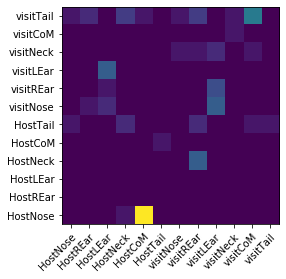

In [165]:
fig, ax = plt.subplots()
ax.imshow(confusion_matrix)
ax.set_xticks([n for n in range(12)])
ax.set_yticks([n for n in range(12)])
ax.set_xticklabels(bodyparts[5:])
ax.set_xlim(-.5, 11.5)
ax.set_ylim(-.5, 11.5)
ax.set_yticklabels(bodyparts[5:]);
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor');


In [166]:
print(confusion_matrix)

[[ 0.  0.  0.  1. 17.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  5.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  2.  0.  0.  0.  2.  0.  0.  1.  1.]
 [ 0.  1.  2.  0.  0.  0.  0.  0.  5.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  4.  0.  0.  0.]
 [ 0.  0.  5.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  1.  2.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 1.  2.  0.  3.  1.  0.  1.  3.  0.  1.  7.  0.]]
